<a href="https://colab.research.google.com/github/Morfatisika/Breastdetect/blob/main/breastcancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define file path in shared Google Drive
csv_file_path = '/content/drive/MyDrive/data.csv'

Mounted at /content/drive


importing the neccesarry libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [44]:
# Load the CSV file directly into a DataFrame
try:
    df = pd.read_csv(csv_file_path)
except pd.errors.ParserError:
    print("Error parsing CSV file. Please check the file format and delimiter.")

# Now df contains the DataFrame loaded from the shared Google Drive

df.head(100)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,M,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
96,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988
98,862485,B,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756


displaying 5 rows of the data and the columns names


In [45]:
# Display the first few rows of the dataset
print(df.head())
print("______________________________________________\n")

#Display the column names
print("The columns in the data set are:")
df.columns

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

checking the information about the data

In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [47]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [48]:
# Display the distribution of the diagnosis
print(df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [49]:
# Check for missing values
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [50]:
# Check for duplicate rows
no_of_duplicates = df.duplicated().sum()
print(f'Number of duplicated data: {no_of_duplicates}')

Number of duplicated data: 0


distribution of classes.
from the plot below the data is somehow balanced


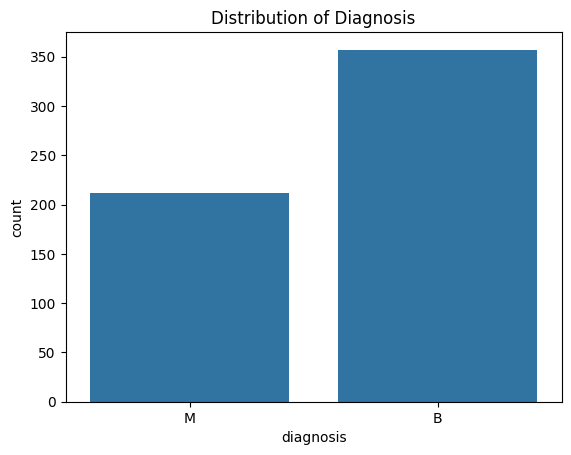

In [51]:
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()

encode the diagnosis column into

In [52]:
# Encode categorical variables
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check if all columns are numeric
print(df.dtypes)

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Pair Plot:
Visualize the relationship between pairs of features.

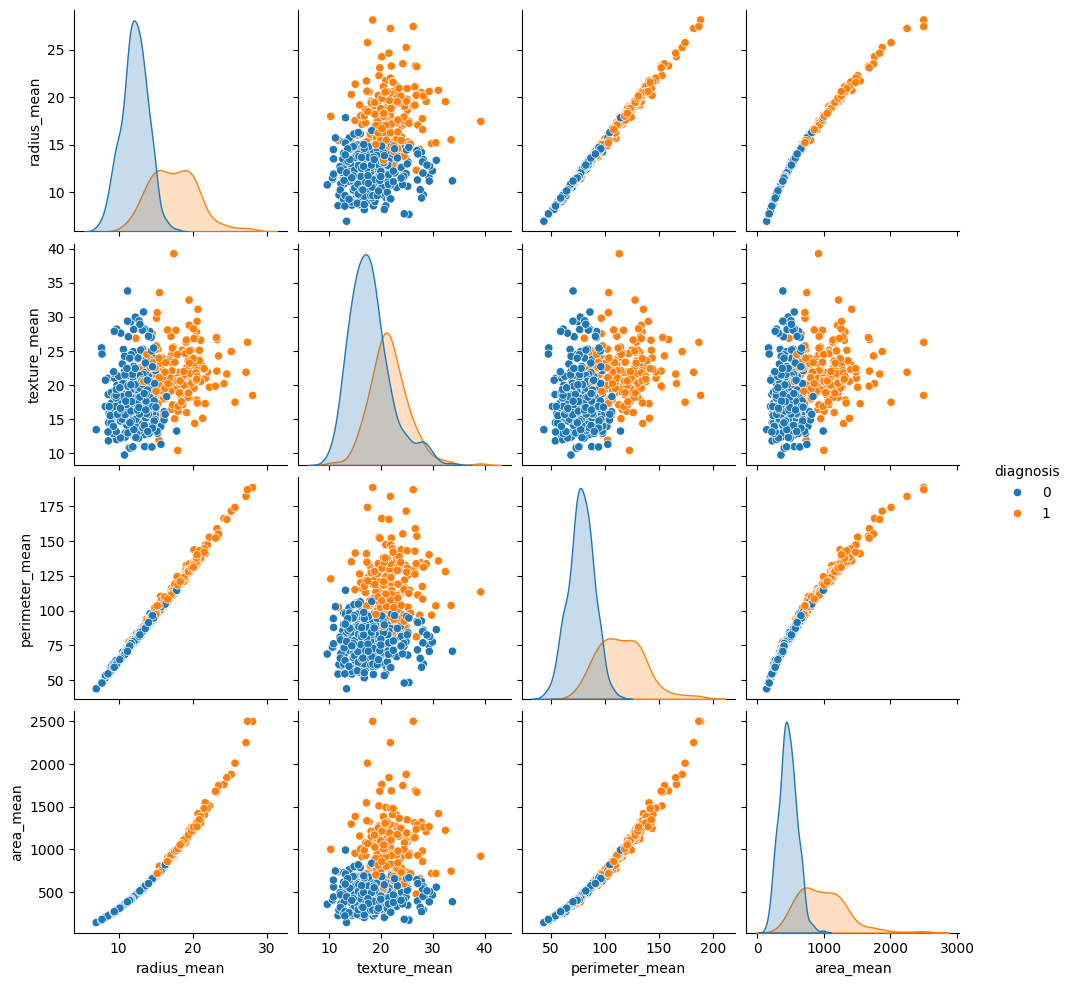

In [53]:
sns.pairplot(df, vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'], hue='diagnosis')
plt.show()


In [54]:
from sklearn.preprocessing import StandardScaler

features = df.columns[2:]  # Exclude 'id' and 'diagnosis'
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


Correlation Matrix:

Identify correlations between features

Correlation Matrix Explanation

A correlation matrix is a table that shows the correlation coefficients between many variables.
Each cell in the table shows the correlation between two variables. The values range between -1 and 1:

1: Perfect positive correlation. When one variable increases, the other variable also increases proportionally.

0: No correlation. There is no relationship between the two variables.

-1: Perfect negative correlation. When one variable increases, the other variable decreases proportionally.


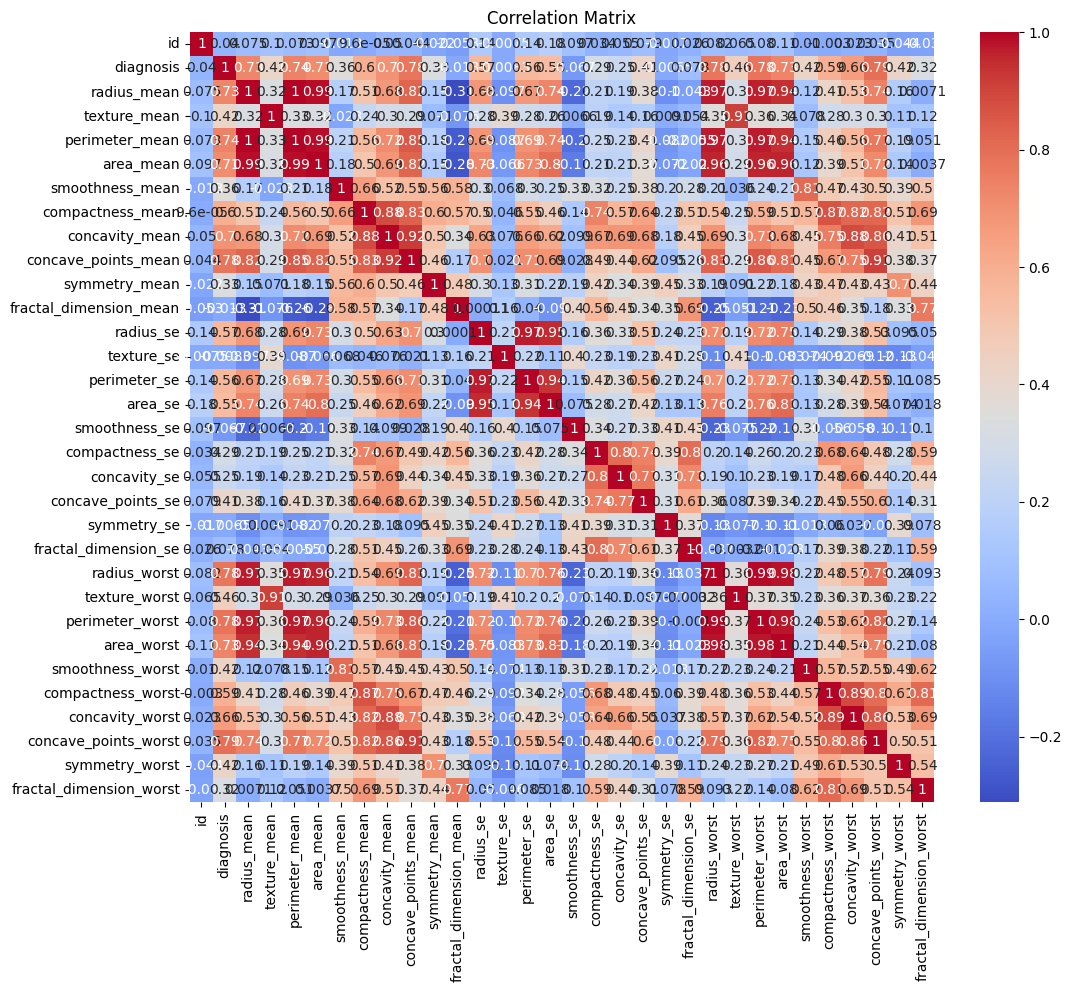

In [55]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


to drop id column from  the dataset

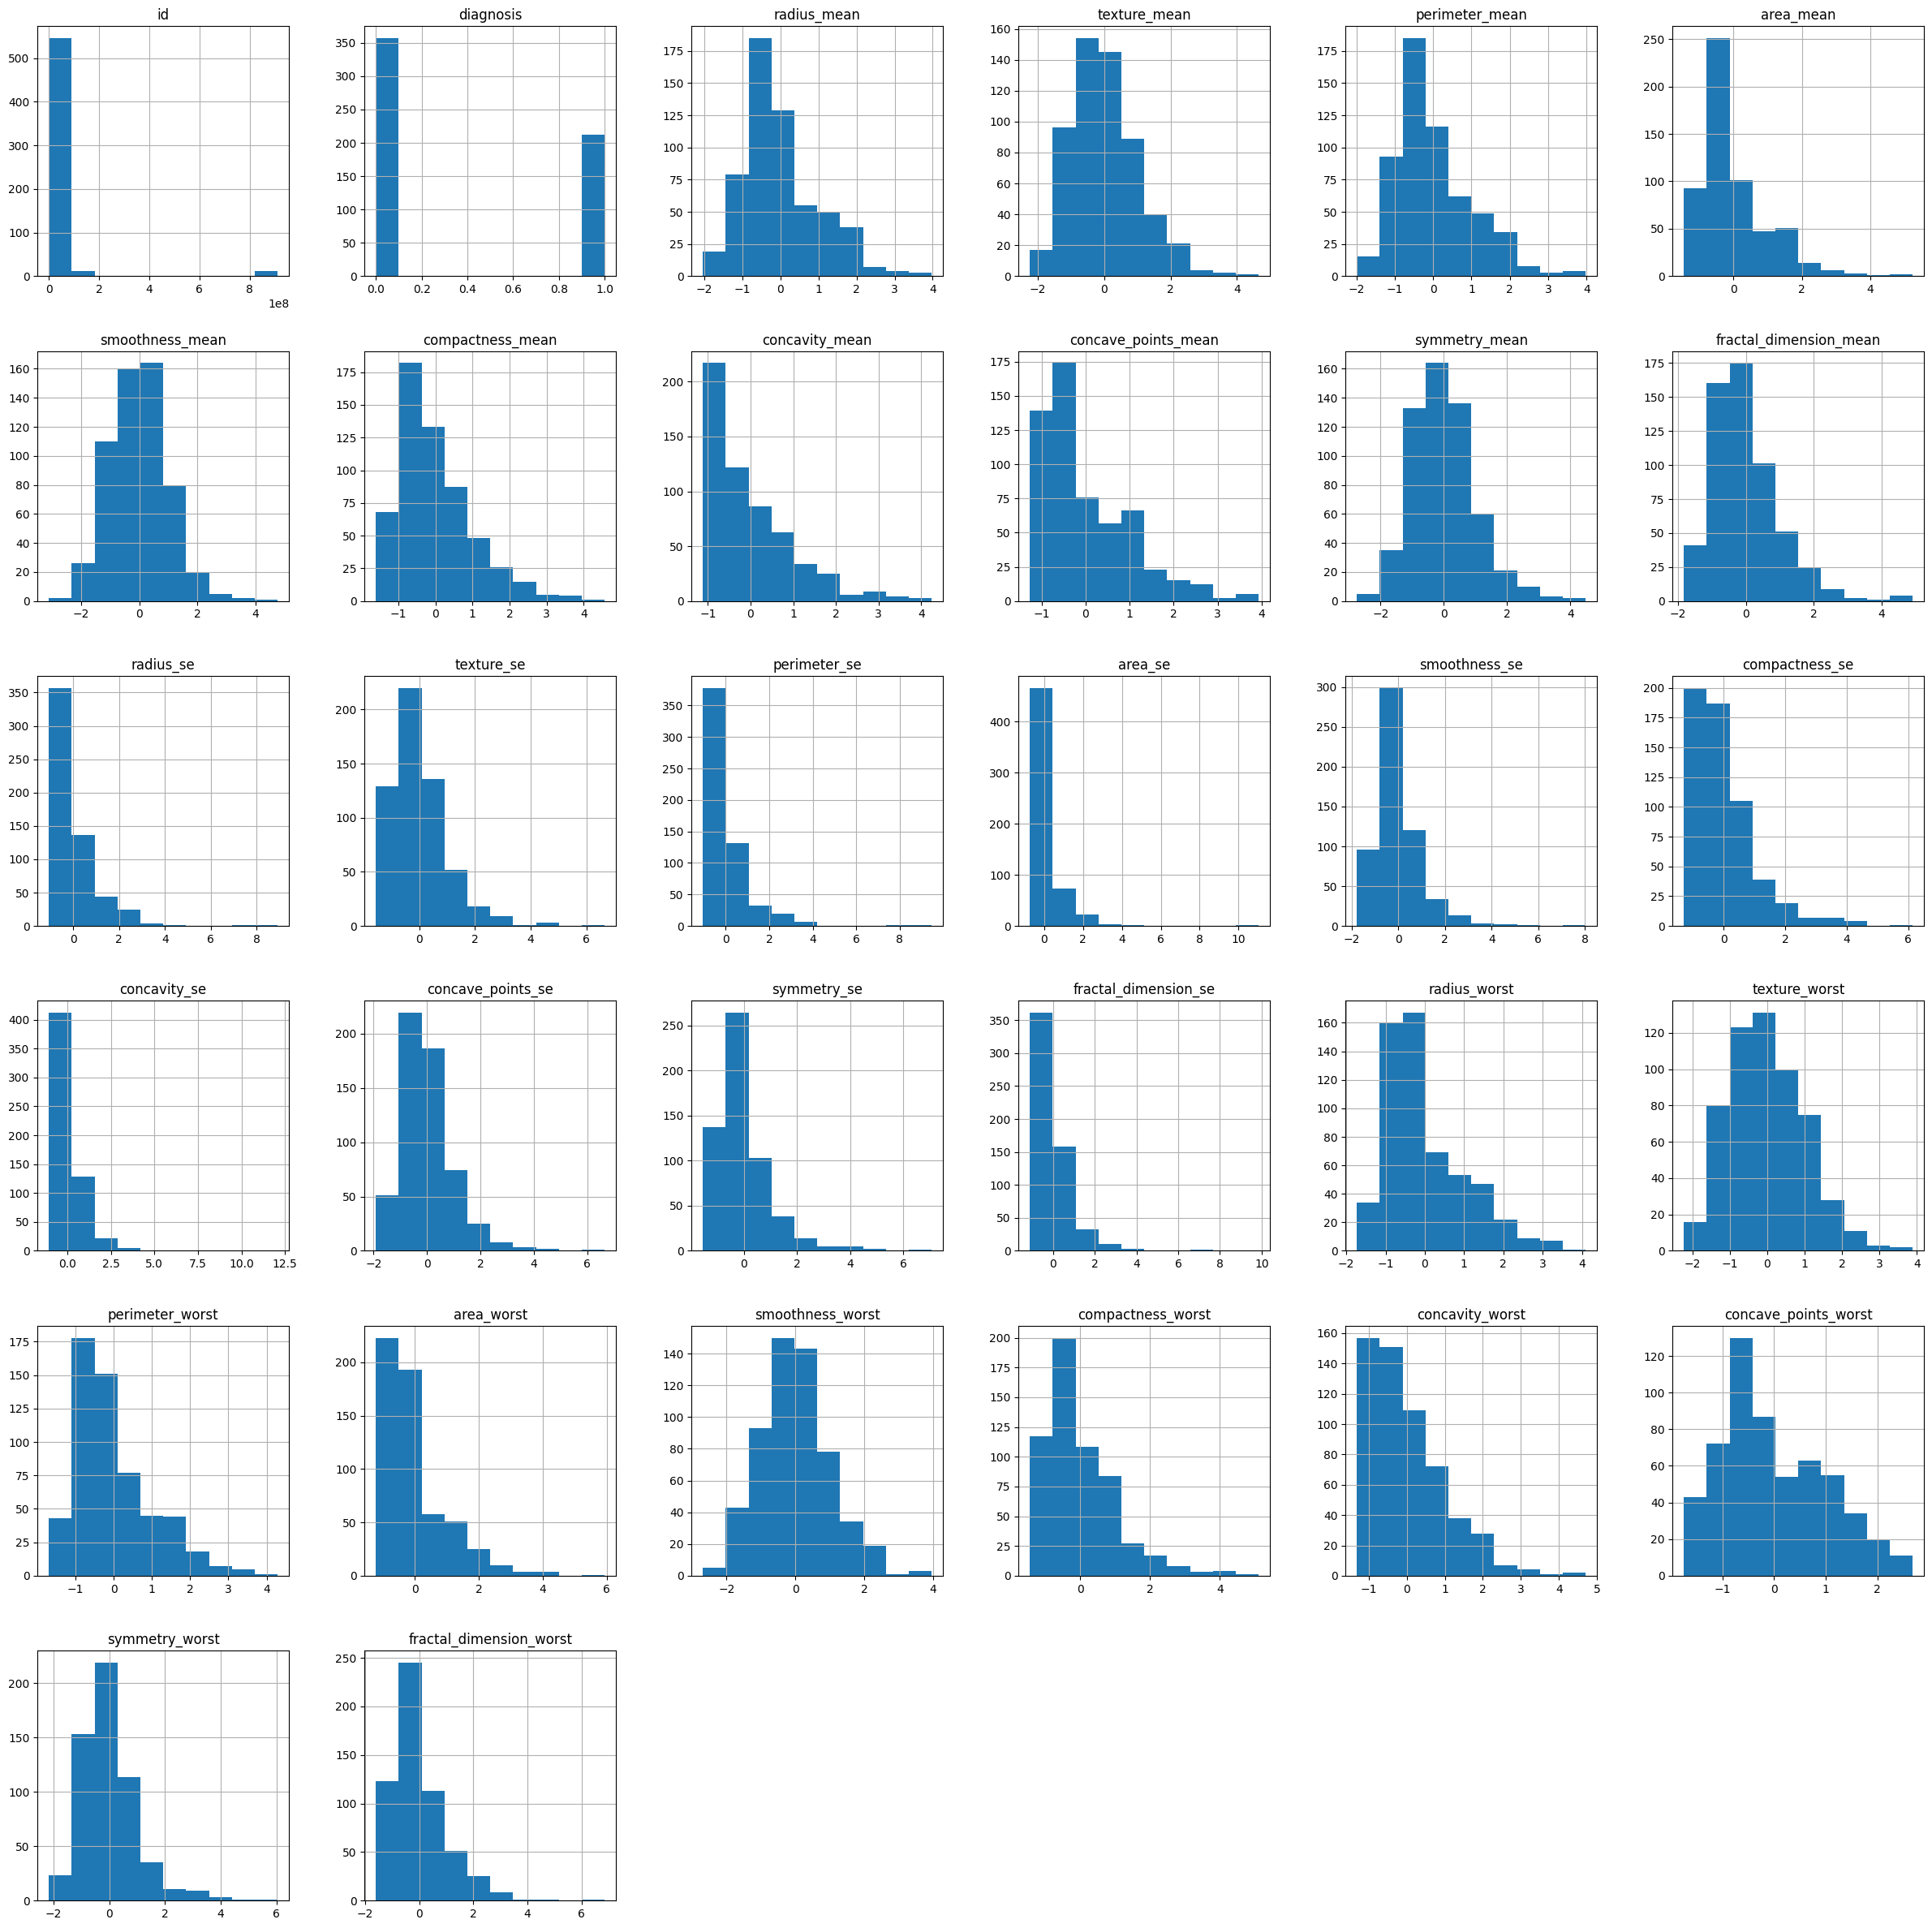

In [56]:
# Plot histograms for each variable
df.hist(figsize = (30, 30))
plt.show()

In [57]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Assuming df is your DataFrame with the breast cancer dataset
# df = pd.read_csv('breast_cancer_dataset.csv')

# Separate features (X) and target variable (y)
y = df['diagnosis']
X = df.drop(['diagnosis','id'],axis=1)

# Function to preprocess text or perform necessary data preprocessing steps
# Define this function based on your specific preprocessing needs
def preprocess_text(text):
    # Implement your preprocessing steps here if needed
    return text

# Function to train and test the model
def train_and_test_model(model, X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Create a pipeline with necessary preprocessing steps and the classifier
    pipeline_model = Pipeline([
        ('scaler', StandardScaler()),  # Example preprocessing step (you may adjust as needed)
        ('clf', model)  # Classifier model (e.g., RandomForestClassifier, SVM, etc.)
    ])

    # Train the pipeline model on the training data
    pipeline_model.fit(X_train, y_train)
    print('Accuracy on training data:', pipeline_model.score(X_train, y_train) * 100)

    # Print the accuracy on the test data
    print('Accuracy on testing data:', pipeline_model.score(X_test, y_test) * 100)

    # Generate predictions on the test data
    y_pred = pipeline_model.predict(X_test)

   # Print the classification report
    report = classification_report(y_test, y_pred)
    #print('Classification Report:\n', report)

    return pipeline_model, report

# Create a dictionary of models excluding MultinomialNB
models = {
    'SVC': SVC(C=1.0, kernel='rbf', gamma='scale'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and test each model, and store the structured classification report
trained_models = {}
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    pipeline_model, report = train_and_test_model(model, X, y)
    trained_models[model_name] = pipeline_model
    print(f"{model_name} Classification Report:\n {report}\n\n")

Training and evaluating SVC...
Accuracy on training data: 98.68131868131869
Accuracy on testing data: 97.36842105263158
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Training and evaluating Logistic Regression...
Accuracy on training data: 98.68131868131869
Accuracy on testing data: 96.49122807017544
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Training and e

In [58]:
# Save the model to a file
import joblib
joblib.dump(pipeline_model, 'breast_cancer_model.pkl')


['breast_cancer_model.pkl']

In [59]:
# Load the model from the file
loaded_model = joblib.load('breast_cancer_model.pkl')
